In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns #remove?
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.externals.six import StringIO  
#import pydotplus
from sklearn.ensemble import RandomForestClassifier

In [2]:
input_file = open("附件1.csv",'rb')

df = pd.read_csv(input_file, header = 0,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1','attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt','weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Data columns (total 26 columns):
iyear              114183 non-null int64
imonth             114183 non-null int64
iday               114183 non-null int64
extended           114183 non-null int64
country            114183 non-null int64
country_txt        114183 non-null object
region             114183 non-null int64
latitude           113249 non-null float64
longitude          113249 non-null float64
multiple           114182 non-null float64
success            114183 non-null int64
suicide            114183 non-null int64
attacktype1        114183 non-null int64
attacktype1_txt    114183 non-null object
targtype1          114183 non-null int64
targtype1_txt      114183 non-null object
natlty1            113057 non-null float64
natlty1_txt        113057 non-null object
individual         114183 non-null int64
claimed            114183 non-null int64
weaptype1          114183 non-null int64
weaptype1_txt   

df_WEur= df[df.region == 8] # A dataframe with region Western Europe
df_EEur= df[df.region ==9] # A dataframe with region Eastern Europe

euro_frames = [df_WEur, df_EEur]
df_Euro = pd.concat(euro_frames) # # A dataframe with whole Europe, both Western & Eastern  
df_Euro.info()

In [3]:
df1 = df.drop([ 'region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df1.head()

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
0,1998,1,1,0,34,Burundi,-3.375828,29.364107,0.0,1,...,2,Armed Assault,4,Military,34.0,Burundi,0,5,Firearms,104.0
1,1998,1,1,0,167,Russia,55.751377,37.579914,0.0,1,...,3,Bombing/Explosion,19,Transportation,167.0,Russia,0,6,Explosives,0.0
2,1998,1,1,0,603,United Kingdom,54.607712,-5.956210,0.0,1,...,2,Armed Assault,14,Private Citizens & Property,233.0,Northern Ireland,0,5,Firearms,1.0
3,1998,1,2,0,95,Iraq,33.303566,44.371773,0.0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),999.0,Multinational,0,6,Explosives,0.0
4,1998,1,2,0,155,West Bank and Gaza Strip,31.995965,35.271110,0.0,0,...,2,Armed Assault,14,Private Citizens & Property,97.0,Israel,0,5,Firearms,0.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Data columns (total 21 columns):
iyear              114183 non-null int64
imonth             114183 non-null int64
iday               114183 non-null int64
extended           114183 non-null int64
country            114183 non-null int64
country_txt        114183 non-null object
latitude           113249 non-null float64
longitude          113249 non-null float64
multiple           114182 non-null float64
success            114183 non-null int64
suicide            114183 non-null int64
attacktype1        114183 non-null int64
attacktype1_txt    114183 non-null object
targtype1          114183 non-null int64
targtype1_txt      114183 non-null object
natlty1            113057 non-null float64
natlty1_txt        113057 non-null object
individual         114183 non-null int64
weaptype1          114183 non-null int64
weaptype1_txt      114183 non-null object
nkill              109903 non-null float64
dtypes: float

In [5]:
df1.describe() 

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
count,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,113249.000000,113249.000000,114182.000000,114183.000000,114183.000000,114183.000000,114183.000000,113057.000000,114183.000000,114183.000000,109903.000000
mean,2011.969269,6.469080,15.566389,0.060736,123.587723,26.481853,50.933208,0.157958,0.873869,0.057198,3.343168,8.752310,127.688838,0.003810,6.391179,2.543561
std,4.535817,3.383126,8.821122,0.238846,97.117870,13.435769,36.664464,0.364704,0.331998,0.232221,1.860464,6.527255,96.280408,0.061605,2.070908,12.375343
min,1998.000000,1.000000,0.000000,0.000000,4.000000,-42.884049,-124.224996,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,2010.000000,4.000000,8.000000,0.000000,92.000000,15.544499,37.762325,0.000000,1.000000,0.000000,2.000000,3.000000,92.000000,0.000000,5.000000,0.000000
50%,2013.000000,6.000000,15.000000,0.000000,95.000000,32.520210,44.623825,0.000000,1.000000,0.000000,3.000000,4.000000,97.000000,0.000000,6.000000,1.000000
75%,2015.000000,9.000000,23.000000,0.000000,160.000000,34.301389,70.834444,0.000000,1.000000,0.000000,3.000000,14.000000,160.000000,0.000000,6.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,74.633553,179.366667,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,13.000000,1570.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Data columns (total 21 columns):
iyear              114183 non-null int64
imonth             114183 non-null int64
iday               114183 non-null int64
extended           114183 non-null int64
country            114183 non-null int64
country_txt        114183 non-null object
latitude           113249 non-null float64
longitude          113249 non-null float64
multiple           114182 non-null float64
success            114183 non-null int64
suicide            114183 non-null int64
attacktype1        114183 non-null int64
attacktype1_txt    114183 non-null object
targtype1          114183 non-null int64
targtype1_txt      114183 non-null object
natlty1            113057 non-null float64
natlty1_txt        113057 non-null object
individual         114183 non-null int64
weaptype1          114183 non-null int64
weaptype1_txt      114183 non-null object
nkill              109903 non-null float64
dtypes: float

In [7]:
df1.describe() 

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
count,114183.000000,114183.000000,114183.000000,114183.000000,114183.000000,113249.000000,113249.000000,114182.000000,114183.000000,114183.000000,114183.000000,114183.000000,113057.000000,114183.000000,114183.000000,109903.000000
mean,2011.969269,6.469080,15.566389,0.060736,123.587723,26.481853,50.933208,0.157958,0.873869,0.057198,3.343168,8.752310,127.688838,0.003810,6.391179,2.543561
std,4.535817,3.383126,8.821122,0.238846,97.117870,13.435769,36.664464,0.364704,0.331998,0.232221,1.860464,6.527255,96.280408,0.061605,2.070908,12.375343
min,1998.000000,1.000000,0.000000,0.000000,4.000000,-42.884049,-124.224996,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,2010.000000,4.000000,8.000000,0.000000,92.000000,15.544499,37.762325,0.000000,1.000000,0.000000,2.000000,3.000000,92.000000,0.000000,5.000000,0.000000
50%,2013.000000,6.000000,15.000000,0.000000,95.000000,32.520210,44.623825,0.000000,1.000000,0.000000,3.000000,4.000000,97.000000,0.000000,6.000000,1.000000
75%,2015.000000,9.000000,23.000000,0.000000,160.000000,34.301389,70.834444,0.000000,1.000000,0.000000,3.000000,14.000000,160.000000,0.000000,6.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1004.000000,74.633553,179.366667,1.000000,1.000000,1.000000,9.000000,22.000000,1004.000000,1.000000,13.000000,1570.000000


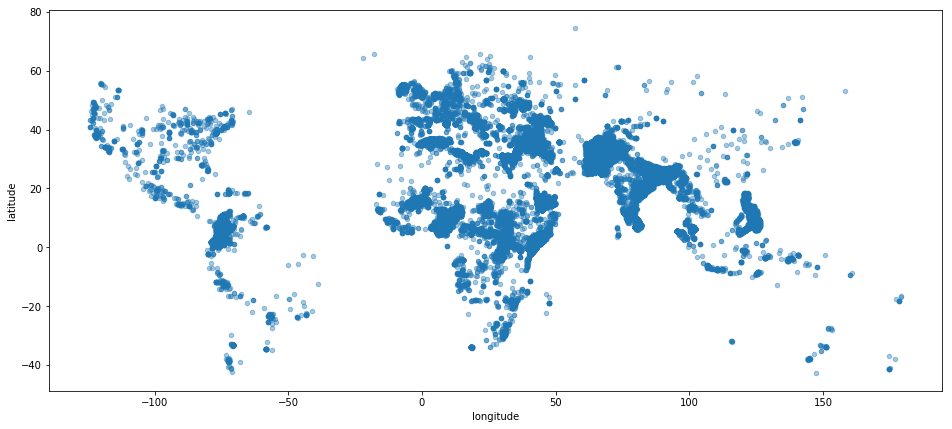

In [8]:
df1.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,7))
plt.show()

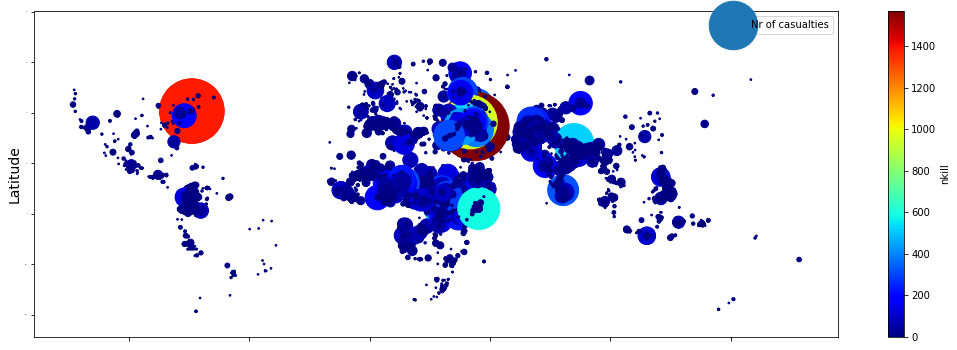

In [9]:
df1.plot(kind= 'scatter', x='longitude', y='latitude', alpha=1.0,  figsize=(18,6),  
               s=df1['nkill']*3, label= 'Nr of casualties', fontsize=1, c='nkill', cmap=plt.get_cmap("jet"), colorbar=True)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

In [10]:
df1['nkill'].fillna(0.686445, inplace=True)
df1['latitude'].fillna(47.004651, inplace=True)
df1['longitude'].fillna(10.921231, inplace=True)
df1['natlty1'].fillna(167.954530, inplace=True)
df1['multiple'].fillna(0, inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Data columns (total 21 columns):
iyear              114183 non-null int64
imonth             114183 non-null int64
iday               114183 non-null int64
extended           114183 non-null int64
country            114183 non-null int64
country_txt        114183 non-null object
latitude           114183 non-null float64
longitude          114183 non-null float64
multiple           114183 non-null float64
success            114183 non-null int64
suicide            114183 non-null int64
attacktype1        114183 non-null int64
attacktype1_txt    114183 non-null object
targtype1          114183 non-null int64
targtype1_txt      114183 non-null object
natlty1            114183 non-null float64
natlty1_txt        113057 non-null object
individual         114183 non-null int64
weaptype1          114183 non-null int64
weaptype1_txt      114183 non-null object
nkill              114183 non-null float64
dtypes: float

In [11]:
terror_peryear = np.asarray(df1.groupby('iyear').iyear.count())
successes_peryear = np.asarray(df1.groupby('iyear').success.sum())

terror_years = np.arange(2015, 2018)

trace1 = go.Bar(x = terror_years, y = terror_peryear, name = 'Nr of terrorist attacks',width = 1)
#trace1 = go.Bar(x = terror_years, y = terror_peryear, name = 'Nr of terrorist attacks')

trace2 = go.Scatter(x = terror_years, y = successes_peryear, name = 'Nr of succesful terrorist attacks',
         line = dict(color = ('rgb(205, 12, 24)'), width = 3))

layout = go.Layout(title = 'Terrorist Attacks by Year in the world (2015-2017)', legend=dict(orientation="h"),
         barmode = 'group')

figure = dict(data = [trace1,trace2], layout = layout)
iplot(figure)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/AttacksByYear.png")

In [12]:
attacks_per_country = (df1.groupby('country_txt').country_txt.count()) 
successes_per_country = (df1.groupby('country_txt').success.sum()) 

trace1 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[290,541,703,1231,1556,1650,2158,2642,3245,5098],
    name='Nr of terrorist attacks per country', orientation = 'h', 
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(color = 'rgba(0, 255, 0,0.)', width = 0.5)))

trace2 = go.Bar(y=['Ireland','West Germany (FRG)','Germany','Greece','Italy','Ukraine','Russia','France','Spain','United Kingdom'],
    x=[135,465,633,1092,1384,1479,1780,2441,2814,4107],
    name='Nr of succesful terrorist attacks per country', orientation = 'h',
    marker = dict(color = 'rgba(128,128,0, 0.4)', line = dict(color = 'rgba(246, 78, 139, 0.2)',width = 0.5)))

data = [trace2,trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 2015-2017 <br>by Country  - TOP 10', barmode='group',
    bargap=0.1, 
    autosize=False,
    width=1000,
    height=1000)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/Top10.png")

In [13]:
trace1 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,1,4,5,6,6,8,10,11,11,13,16,16,16,18,18,18,20,21,29,36,38,41,46,52,57,78,79,108,109,117,118,128,132,139,148,159,188,203],
    name='Nr of terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(255,0,0, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace2 = go.Bar(
    y=['Andorra','Vatican City','Iceland','Montenegro','Romania','Slovenia','Lithuania','Czechoslovakia',
       'Serbia','Serbia-Montenegro','Belarus','Estonia','Latvia','Luxembourg','Finland','Norway','Slovak Republic',
       'Malta','Moldova','Czech Republic','Poland','East Germany (GDR)','Denmark','Hungary','Bulgaria','Croatia',
       'Soviet Union','Albania','Switzerland','Austria','Macedonia','Sweden','Netherlands','Cyprus','Portugal',
       'Belgium','Bosnia-Herzegovina','Kosovo','Yugoslavia'],
    x=[1,0,4,5,4,6,7,7,10,10,13,16,12,14,17,16,15,19,18,20,31,35,35,40,46,55,67,63,90,87,106,104,106,112,129,123,151,165,179],
    name='Nr of succesful terrorist attacks per country',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace2, trace1]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in Europe 1970-2016 <br>by Country outside the Top 10',
    barmode='group',
    bargap=0.1,
    #bargroupgap=0.1,
    autosize=False,
    width=900,
    height=1500,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/BelowTop10.png")

In [14]:
attacks_per_type = (df1.groupby('attacktype1_txt').attacktype1_txt.count())
successes_per_type = (df1.groupby('attacktype1_txt').success.sum())

trace2 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[89,106,183,373,485,2752,2911,3295,11144],
    name='Nr of terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,0,0, 0.8)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 1)))

trace1 = go.Bar(
    y=['Hijacking','Hostage Taking (Barricade Incident)','Unarmed Assault','Unknown','Hostage Taking (Kidnapping)','Facility/Infrastructure Attack','Armed Assault','Assassination','Bombing/Explosion'],
    x=[76,105,149,333,457,2530,2637,2588,9393],
    name='Nr of succesful terrorist attacks',
    orientation = 'h',
    marker = dict(
        color = 'rgba(128,128,0, 0.4)',
        line = dict(
            color = 'rgba(246, 78, 139, 0.2)',
            width = 0.5)))

data = [trace1, trace2]
layout = go.Layout(
    legend=dict(x=0.5, y=0.5), # placing legend in the middle
    title = 'Terrorist attacks in the world 1998-2017 <br>by Type',
    barmode='group',
    bargap=0.1,
    bargroupgap=0,
    autosize=False,
    width=1000,
    height=500,
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/AttacksByType.png")

In [15]:
df1.corr()

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
iyear,1.000000,-0.014291,0.033107,0.007948,-0.023660,-0.027429,0.100086,0.043372,-0.104060,0.020202,0.059001,0.026190,0.003507,-0.003091,0.064063,-0.017733
imonth,-0.014291,1.000000,0.007809,-0.000326,-0.000396,0.005339,0.000099,-0.001465,-0.006147,0.002257,0.012241,0.000334,0.002590,-0.000885,0.013403,0.001942
iday,0.033107,0.007809,1.000000,-0.007058,-0.000364,0.007881,0.008389,0.003394,-0.016875,0.002612,-0.000328,0.004303,-0.000606,-0.002714,0.002831,-0.005859
extended,0.007948,-0.000326,-0.007058,1.000000,0.000766,-0.065499,-0.042991,-0.016130,0.092854,-0.053160,0.314123,0.015739,0.015924,-0.013345,0.241603,0.022401
country,-0.023660,-0.000396,-0.000364,0.000766,1.000000,-0.074013,-0.063310,0.018288,-0.027089,-0.053713,0.013038,0.026185,0.624544,0.042846,0.002254,-0.004818
latitude,-0.027429,0.005339,0.007881,-0.065499,-0.074013,1.000000,-0.089821,-0.036978,-0.048123,0.063543,-0.012590,0.013094,-0.177440,0.051522,-0.005736,-0.005847
longitude,0.100086,0.000099,0.008389,-0.042991,-0.063310,-0.089821,1.000000,-0.037727,-0.012170,-0.024033,-0.061456,-0.042997,0.004083,-0.128949,-0.057887,-0.036607
multiple,0.043372,-0.001465,0.003394,-0.016130,0.018288,-0.036978,-0.037727,1.000000,0.022922,0.024961,0.080551,0.032285,0.010619,0.005960,0.046148,0.018631
success,-0.104060,-0.006147,-0.016875,0.092854,-0.027089,-0.048123,-0.012170,0.022922,1.000000,-0.026382,0.053459,-0.101772,0.005757,-0.012475,-0.015187,0.050582
suicide,0.020202,0.002257,0.002612,-0.053160,-0.053713,0.063543,-0.024033,0.024961,-0.026382,1.000000,-0.051798,-0.041765,-0.010300,-0.002376,-0.046526,0.152870


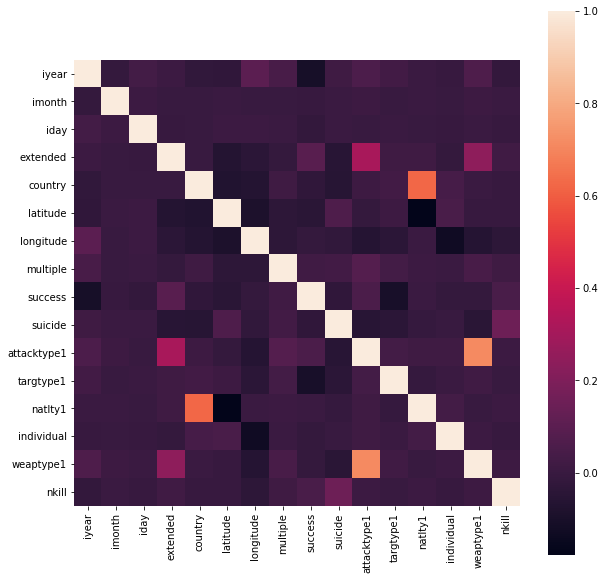

In [16]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [17]:
df1

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
0,1998,1,1,0,34,Burundi,-3.375828,29.364107,0.0,1,...,2,Armed Assault,4,Military,34.0,Burundi,0,5,Firearms,104.000000
1,1998,1,1,0,167,Russia,55.751377,37.579914,0.0,1,...,3,Bombing/Explosion,19,Transportation,167.0,Russia,0,6,Explosives,0.000000
2,1998,1,1,0,603,United Kingdom,54.607712,-5.956210,0.0,1,...,2,Armed Assault,14,Private Citizens & Property,233.0,Northern Ireland,0,5,Firearms,1.000000
3,1998,1,2,0,95,Iraq,33.303566,44.371773,0.0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),999.0,Multinational,0,6,Explosives,0.000000
4,1998,1,2,0,155,West Bank and Gaza Strip,31.995965,35.271110,0.0,0,...,2,Armed Assault,14,Private Citizens & Property,97.0,Israel,0,5,Firearms,0.000000
5,1998,1,4,0,118,Macedonia,42.135812,21.717896,1.0,1,...,3,Bombing/Explosion,3,Police,118.0,Macedonia,0,6,Explosives,0.686445
6,1998,1,4,0,118,Macedonia,41.351730,21.562140,1.0,1,...,3,Bombing/Explosion,3,Police,118.0,Macedonia,0,6,Explosives,0.686445
7,1998,1,5,0,15,Austria,47.070714,15.439504,0.0,0,...,3,Bombing/Explosion,3,Police,15.0,Austria,0,6,Explosives,0.000000
8,1998,1,5,0,86,Guyana,6.821806,-58.159218,1.0,1,...,3,Bombing/Explosion,10,Journalists & Media,86.0,Guyana,0,6,Explosives,0.000000
9,1998,1,5,0,168,Rwanda,-2.080109,29.759880,1.0,1,...,2,Armed Assault,14,Private Citizens & Property,168.0,Rwanda,0,5,Firearms,14.000000


In [18]:
#from sklearn.model_selection import train_test_split
X = df1.drop([], axis=1)
y = df1['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114183 entries, 0 to 114182
Data columns (total 21 columns):
iyear              114183 non-null int64
imonth             114183 non-null int64
iday               114183 non-null int64
extended           114183 non-null int64
country            114183 non-null int64
country_txt        114183 non-null object
latitude           114183 non-null float64
longitude          114183 non-null float64
multiple           114183 non-null float64
success            114183 non-null int64
suicide            114183 non-null int64
attacktype1        114183 non-null int64
attacktype1_txt    114183 non-null object
targtype1          114183 non-null int64
targtype1_txt      114183 non-null object
natlty1            114183 non-null float64
natlty1_txt        113057 non-null object
individual         114183 non-null int64
weaptype1          114183 non-null int64
weaptype1_txt      114183 non-null object
nkill              114183 non-null float64
dtypes: float

In [20]:
features = [ 'extended', 'country', 'region', 'latitude', 'longitude','success', 'suicide','attacktype1', 'targtype1', 'natlty1',
            'weaptype1' ,'nkill','multiple', 'individual', 'claimed','nkill','nkillter', 'nwound', 'nwoundte']

In [21]:
features = [ 'extended', 'country']

In [22]:
df1

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
0,1998,1,1,0,34,Burundi,-3.375828,29.364107,0.0,1,...,2,Armed Assault,4,Military,34.0,Burundi,0,5,Firearms,104.000000
1,1998,1,1,0,167,Russia,55.751377,37.579914,0.0,1,...,3,Bombing/Explosion,19,Transportation,167.0,Russia,0,6,Explosives,0.000000
2,1998,1,1,0,603,United Kingdom,54.607712,-5.956210,0.0,1,...,2,Armed Assault,14,Private Citizens & Property,233.0,Northern Ireland,0,5,Firearms,1.000000
3,1998,1,2,0,95,Iraq,33.303566,44.371773,0.0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),999.0,Multinational,0,6,Explosives,0.000000
4,1998,1,2,0,155,West Bank and Gaza Strip,31.995965,35.271110,0.0,0,...,2,Armed Assault,14,Private Citizens & Property,97.0,Israel,0,5,Firearms,0.000000
5,1998,1,4,0,118,Macedonia,42.135812,21.717896,1.0,1,...,3,Bombing/Explosion,3,Police,118.0,Macedonia,0,6,Explosives,0.686445
6,1998,1,4,0,118,Macedonia,41.351730,21.562140,1.0,1,...,3,Bombing/Explosion,3,Police,118.0,Macedonia,0,6,Explosives,0.686445
7,1998,1,5,0,15,Austria,47.070714,15.439504,0.0,0,...,3,Bombing/Explosion,3,Police,15.0,Austria,0,6,Explosives,0.000000
8,1998,1,5,0,86,Guyana,6.821806,-58.159218,1.0,1,...,3,Bombing/Explosion,10,Journalists & Media,86.0,Guyana,0,6,Explosives,0.000000
9,1998,1,5,0,168,Rwanda,-2.080109,29.759880,1.0,1,...,2,Armed Assault,14,Private Citizens & Property,168.0,Rwanda,0,5,Firearms,14.000000


In [23]:
X_train

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
65489,2014,6,6,0,95,Iraq,36.344086,43.327324,0.0,1,...,3,Bombing/Explosion,14,Private Citizens & Property,95.0,Iraq,0,6,Explosives,6.000000
108213,2017,6,9,0,92,India,33.776319,75.005476,0.0,0,...,9,Unknown,3,Police,92.0,India,0,13,Unknown,0.000000
105799,2017,3,25,0,123,Mali,11.988605,-7.910265,0.0,1,...,2,Armed Assault,2,Government (General),123.0,Mali,0,5,Firearms,1.000000
7980,2003,5,2,0,160,Philippines,7.054776,124.676036,0.0,1,...,2,Armed Assault,4,Military,160.0,Philippines,0,5,Firearms,3.000000
83632,2015,7,28,0,153,Pakistan,30.200819,66.994354,0.0,1,...,2,Armed Assault,3,Police,153.0,Pakistan,0,5,Firearms,2.000000
86844,2015,10,17,0,18,Bahrain,26.123898,50.469706,1.0,1,...,2,Armed Assault,15,Religious Figures/Institutions,18.0,Bahrain,0,5,Firearms,0.000000
23743,2009,3,29,0,160,Philippines,14.740025,121.149719,0.0,1,...,2,Armed Assault,14,Private Citizens & Property,160.0,Philippines,0,5,Firearms,2.000000
32474,2011,1,23,0,153,Pakistan,33.915234,71.458679,1.0,1,...,3,Bombing/Explosion,16,Telecommunication,153.0,Pakistan,0,6,Explosives,0.000000
106254,2017,4,8,0,93,Indonesia,-6.984746,111.952249,0.0,0,...,2,Armed Assault,3,Police,93.0,Indonesia,0,5,Firearms,6.000000
87371,2015,10,30,0,96,Ireland,53.386772,-6.377167,0.0,0,...,3,Bombing/Explosion,14,Private Citizens & Property,96.0,Ireland,0,6,Explosives,0.000000


In [24]:
y = df1['success'] #this is what we're trying to predict!
X = df1[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)
#Two lines of code to create the classifier!!

ValueError: could not convert string to float: 'Firearms'

In [ ]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

In [ ]:
y = df1['success'] 
X = df1[features]
dtc = tree.DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,dtc_pred))

In [ ]:
print(confusion_matrix(y_test,dtc_pred))

In [ ]:
rfc = RandomForestClassifier(n_estimators=50) 
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

In [ ]:
for name, score in zip(X_train[features], rfc.feature_importances_):
    print(name, score)

In [ ]:
data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
#Image("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Global Terrorism Database/Charts/FeatureImportance.png")

In [ ]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfc.fit(X, y) #clf

month = 12           # in which month would the attack take place
day = 23             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 48.8566
longitude = 2.3522
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 0            # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")